# naver_cafe _2015_밥

In [3]:
from konlpy.tag import Okt
from collections import Counter
import wordcloud

import numpy as np  
import pandas as pd

#이미지 불러와서 사용할 것
from PIL import Image  
import matplotlib.pyplot as plt 

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## 1. 데이터 로드

In [4]:
# 크롤링 데이터 불러오기
text = pd.read_csv("crawling_Data/2015_naver_cafe_bab_t.csv", encoding='cp949', header=None)
text

,0,1
0,밥을 입에 물고 안씹는 25개월 아이,2015.12.14.
1,첫 압력솥밥이어요~^^,2015.10.04.
2,중국쌀로 냄비에 밥하기,2015.10.11.
3,하루중 유일하게 편하게 밥먹는 시간..ㅠ,2015.05.15.
4,먹어도 살찌지 않는 밥 만드는법....,2015.10.17.
...,...,...
995,밥주기 무서워요..,2015.02.16.
996,밥먹는거 내려놔야하나요 ㅠ,2015.08.30.
997,아...밥하기싫소,2015.01.21.
998,아이가밥을안먹어요...,2015.10.19.


In [5]:
# 데이터 확인
text[0][0]

'밥을 입에 물고 안씹는 25개월 아이'

In [6]:
# 판다스의 데이터 프레임으로 가져온 text를 str로 저장
q=" "
for i in range(1000):
    q+=text[0][i]

## 2. OKT 형태소 분석기 사용

In [7]:
# 명사추출
okt = Okt()
nouns_list = okt.nouns(q)

## 3. 데이터 정제

In [15]:
stopwords= ['밥','밥밥','때','우리','셔틀','개월']

In [16]:
# 데이터 정제
for noun in nouns_list:
    if len(noun) == 1:
      nouns_list.remove(noun)
    if noun in stopwords:
      nouns_list.remove(noun)

## 4. 빈도 확인

In [21]:
# 명사별 빈도구해 딕셔너리로 저장
cnt = Counter(nouns_list)

In [22]:
top20=cnt.most_common(20)
top20

[('집밥', 79),
 ('아이', 35),
 ('오늘', 33),
 ('아침밥', 30),
 ('콩나물', 28),
 ('아기', 25),
 ('현미', 19),
 ('저녁', 19),
 ('먹기', 17),
 ('냄비', 15),
 ('시간', 14),
 ('엄마', 14),
 ('밥전', 13),
 ('길냥이', 13),
 ('혼자', 13),
 ('흙애', 13),
 ('아들', 11),
 ('새우', 11),
 ('후기', 11),
 ('아가', 11)]

## 5. 빈도그래프

In [19]:
# 폰트 깨짐 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

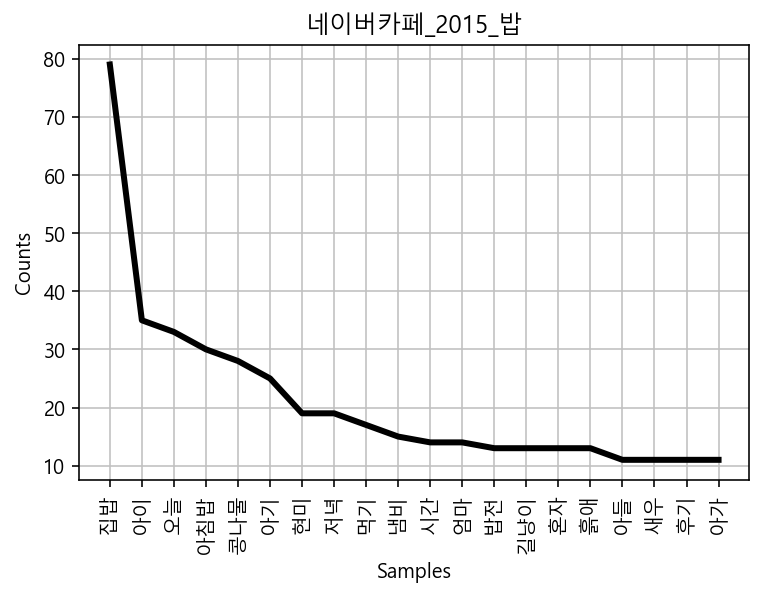

<AxesSubplot:title={'center':'네이버카페_2015_밥'}, xlabel='Samples', ylabel='Counts'>

In [20]:
import nltk
fregra = nltk.FreqDist(nouns_list)

fregra.plot(20, cumulative=False, color='black',
                   title="네이버카페_2015_밥", linewidth=3)